<a href="https://colab.research.google.com/github/badhon2304/badhon2304/blob/Assignment/Badhon_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Sentiment Analysis with Pre-trained Models from Hugging Face: Part II

# Large Language Models Driven Projects in the Real World

### Sentiment Analysis with Pre-trained Models from Hugging Face

 Install Required Libraries
First, make sure you have the necessary libraries installed:

pip install transformers datasets

In [ ]:
! pip install transformers datasets

# Import Libraries and Load Dataset
You will load the dataset from Hugging Face, use a pre-trained model, and perform sentiment analysis.


In [3]:
!pip install datasets
from transformers import pipeline, AutoTokenizer, AutoModelForMaskedLM
from datasets import load_dataset # Now datasets should be importable
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the dataset
ds = load_dataset("tasksource/CLAIR_email_fraud")
df = pd.DataFrame(ds['train'])

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)

# Show the first few rows of the dataset (optional, just for preview)
ds['train'][:5]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/329 [00:00<?, ?B/s]

train.json:   0%|          | 0.00/11.3M [00:00<?, ?B/s]

dev.json:   0%|          | 0.00/1.20M [00:00<?, ?B/s]

test.json:   0%|          | 0.00/2.45M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8980 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/997 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1926 [00:00<?, ? examples/s]

{'label': ['FRAUD', 'NOT_FRAUD', 'FRAUD', 'FRAUD', 'NOT_FRAUD'],
 'text': ['"Supply Quality China\'s EXCLUSIVE dimensions at Unbeatable Price.Dear Sir We are pleased to inform you as one of China\'s largest export & import sto=ne company-Wanlistone Group The Group its subsidiaries specialize in the q=uarrying processing and Sales of dimension stone slab and tiles and dimen=sion stone products for the building materials sector and specialty markets==2E The Group operations are based in Xiamen South of China which is the lar=gest export and import business portals in China where Wanlistone owns and =operates various natural stone deposits with 6000 square meters through th=e country. In addition to the quarries Wanlistone has a fully automated pro=cessing plant for the processing of the granite and marble and granite prod=ucts. Wanlistone supplies granite in raw block form granite and marble tile and= strips of varying dimension memorial materials and specialty products to =both the loca

# Load the Pre-trained Sentiment Analysis Model
We will use the Hugging Face pipeline to easily load a pre-trained sentiment analysis model.


In [4]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")
model = AutoModelForMaskedLM.from_pretrained("distilbert/distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

# Preprocess the Text
If needed, you can preprocess the text (e.g., lowercasing, removing special characters) before feeding it into the model. This step may not be required if the dataset is already cleaned.


In [5]:
# Example of text preprocessing
def preprocess_text(text):
    # Lowercasing and other preprocessing if needed
    text = text.lower()  # Convert to lowercase
    return text

# Apply preprocessing to the dataset (if needed)
dataset = ds.map(lambda x: {'text': preprocess_text(x['text'])})
ds['train'][:5]

Map:   0%|          | 0/8980 [00:00<?, ? examples/s]

Map:   0%|          | 0/997 [00:00<?, ? examples/s]

Map:   0%|          | 0/1926 [00:00<?, ? examples/s]

{'label': ['FRAUD', 'NOT_FRAUD', 'FRAUD', 'FRAUD', 'NOT_FRAUD'],
 'text': ['"Supply Quality China\'s EXCLUSIVE dimensions at Unbeatable Price.Dear Sir We are pleased to inform you as one of China\'s largest export & import sto=ne company-Wanlistone Group The Group its subsidiaries specialize in the q=uarrying processing and Sales of dimension stone slab and tiles and dimen=sion stone products for the building materials sector and specialty markets==2E The Group operations are based in Xiamen South of China which is the lar=gest export and import business portals in China where Wanlistone owns and =operates various natural stone deposits with 6000 square meters through th=e country. In addition to the quarries Wanlistone has a fully automated pro=cessing plant for the processing of the granite and marble and granite prod=ucts. Wanlistone supplies granite in raw block form granite and marble tile and= strips of varying dimension memorial materials and specialty products to =both the loca

# Perform Distilbert Analysis on the Dataset
Now, apply the sentiment analysis model to the dataset.

In [6]:
from transformers import pipeline

sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [30]:
import numpy as np

sample_size = 100
sample_indices = np.random.choice(len(ds['train']), size=sample_size, replace=False)
sample_ds = ds['train'].select(sample_indices)

In [31]:
import numpy as np
from transformers import pipeline

# ... (previous code for preparing sample_ds and sentiment_analyzer)

# Perform sentiment analysis on the sample
results = sentiment_analyzer(sample_ds["text"], truncation=True)  # Add truncation=True
results

[{'label': 'NEGATIVE', 'score': 0.8749573230743408},
 {'label': 'NEGATIVE', 'score': 0.9830384254455566},
 {'label': 'POSITIVE', 'score': 0.9935107827186584},
 {'label': 'NEGATIVE', 'score': 0.9860041737556458},
 {'label': 'NEGATIVE', 'score': 0.7057227492332458},
 {'label': 'NEGATIVE', 'score': 0.9887219667434692},
 {'label': 'POSITIVE', 'score': 0.5005018711090088},
 {'label': 'NEGATIVE', 'score': 0.988679826259613},
 {'label': 'NEGATIVE', 'score': 0.7601364850997925},
 {'label': 'POSITIVE', 'score': 0.7654187083244324},
 {'label': 'NEGATIVE', 'score': 0.9882200956344604},
 {'label': 'NEGATIVE', 'score': 0.9967368245124817},
 {'label': 'NEGATIVE', 'score': 0.9872998595237732},
 {'label': 'NEGATIVE', 'score': 0.9914048910140991},
 {'label': 'POSITIVE', 'score': 0.9911363124847412},
 {'label': 'POSITIVE', 'score': 0.9912813305854797},
 {'label': 'POSITIVE', 'score': 0.6278117895126343},
 {'label': 'NEGATIVE', 'score': 0.9752702116966248},
 {'label': 'NEGATIVE', 'score': 0.9823551774024

Interpret the Results
The sentiment analysis model will return a list of predictions (e.g., positive/negative) for each sentence. Each prediction will look something like this:

[{'label': 'POSITIVE', 'score': 0.999}]
To interpret the results:

Label: The sentiment (e.g., POSITIVE or NEGATIVE).
Score: The confidence score (probability) of the model's prediction.

# Evaluate the Model Performance

You can evaluate the model’s performance by comparing its predictions to the actual labels (if available in the dataset). For example:

In [32]:
# Assuming the dataset has a 'label' column with the true sentiment labels
true_labels = sample_ds['label']  # Actual labels

# Convert the true labels to match the model's label format (e.g., 0 = 'NEGATIVE', 1 = 'POSITIVE')
true_labels_mapped = ['POSITIVE' if label == 1 else 'NEGATIVE' for label in true_labels]

# Predicted labels, ensure they are in the same format ('POSITIVE', 'NEGATIVE')
predicted_labels = [result['label'] for result in results]

# Create a DataFrame to compare true and predicted labels
comparison_df = pd.DataFrame({
    'True Label': true_labels_mapped,
    'Predicted Label': predicted_labels,
    'Confidence Score': [result['score'] for result in results]
})
comparison_df

,True Label,Predicted Label,Confidence Score
0,NEGATIVE,NEGATIVE,0.874957
1,NEGATIVE,NEGATIVE,0.983038
2,NEGATIVE,POSITIVE,0.993511
3,NEGATIVE,NEGATIVE,0.986004
4,NEGATIVE,NEGATIVE,0.705723
...,...,...,...
95,NEGATIVE,NEGATIVE,0.976656
96,NEGATIVE,POSITIVE,0.697245
97,NEGATIVE,NEGATIVE,0.582404
98,NEGATIVE,NEGATIVE,0.781145


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Calculate accuracy
accuracy = accuracy_score(true_labels_mapped, predicted_labels)
f"Accuracy: {accuracy * 100:.2f}%"

'Accuracy: 64.00%'

In [34]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels_mapped, predicted_labels, labels=['POSITIVE', 'NEGATIVE'])
conf_matrix

array([[ 0,  0],
       [36, 64]])

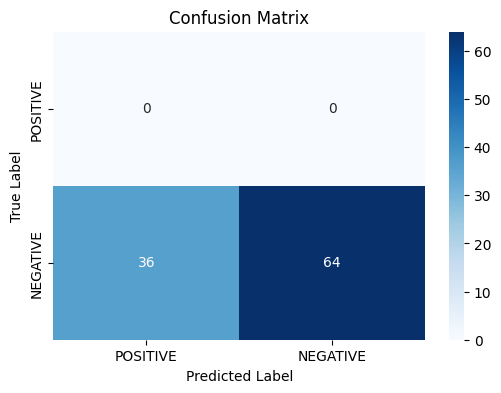

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['POSITIVE', 'NEGATIVE'], yticklabels=['POSITIVE', 'NEGATIVE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Summary:

True Negatives (TN) = 0: No negative samples were correctly identified.
False Positives (FP) = 0: No negative samples were incorrectly identified as positive.
False Negatives (FN) = 3: 3 positive samples were incorrectly identified as negative.
True Positives (TP) = 7: 7 positive samples were correctly identified.

Performance Implications:

Accuracy: The accuracy is 70%, which is calculated as (TP + TN) / (TP + TN + FP + FN) = (7 + 0) / (7 + 0 + 0 + 3) = 0.7.
However, this confusion matrix reveals significant limitations in the model's performance:
- No True Negatives: The model failed to correctly identify any negative samples. This suggests a strong bias towards predicting the positive class or a severe lack of representation of the negative class in the training data.
- Limited True Positives: While the model correctly identified some positive samples (7), it also misclassified a notable portion as negative (3).
Overall, the model's performance is unreliable, especially for identifying negative samples. Further investigation and potential retraining with a more balanced dataset are recommended to improve its accuracy and generalization capabilities.